Fashion MNIST Classification with Artificial Neural Networks (ANNs) and Visualizations

Objective: The objective of this assignment is to build an Artificial Neural Network (ANN) model using the Fashion MNIST dataset available in Keras. Create visualizations, compile the model, and evaluate its performance on both training and validation sets. Finally, use the trained model to predict on the test data.

In [1]:
import tensorflow as tf
from tensorflow import keras

# Load the mnist dataset
from keras.datasets import fashion_mnist

# Import types of hidden layes
from tensorflow.keras.optimizers import Adam

# Import Adam optimizer
from tensorflow.keras.layers import  Conv2D, MaxPooling2D, Dense, Flatten

from tensorflow.keras.models  import Sequential

import matplotlib.pyplot as plt
import numpy as np


### Load and Explore the Fashion MNIST Dataset:

In [2]:
df_fashion = fashion_mnist.load_data()

In [3]:
(X_train, y_train), (X_test, y_test) = df_fashion

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
# Check for missing values
print(np.isnan(X_train).sum())
print(np.isnan(y_train).sum())
print(np.isnan(X_test).sum())
print( np.isnan(y_test).sum())

0
0
0
0


No missing values in dataset

In [6]:
# Class Names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

The data from Keras contain training set (60,000 images) and a testing set (10,000 images). Each image is represented as a 28x28 array with pixel values ranging from 0 to 255, and the labels consist of an array of integers from 0 to 9, corresponding to 10 different classes of clothing.

### Visualizations:
- Exploring and visualizing the data

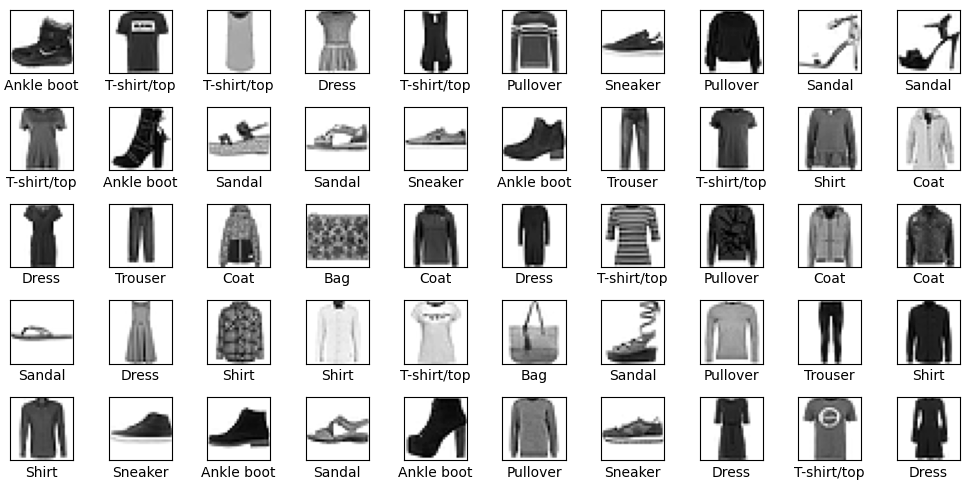

In [7]:
# Function to display a grid of images
def display_images(images, labels, rows, cols):
    plt.figure(figsize=(cols, rows))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.tight_layout()
    plt.show()

# Display a subset of the dataset
rows = 5
cols = 10
display_images(X_train, y_train, rows, cols)

In [8]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

### On the training set, we have 60,000 samples and on the testing set, we have 10,000 samples, each arranged in a 28 by 28 shape.

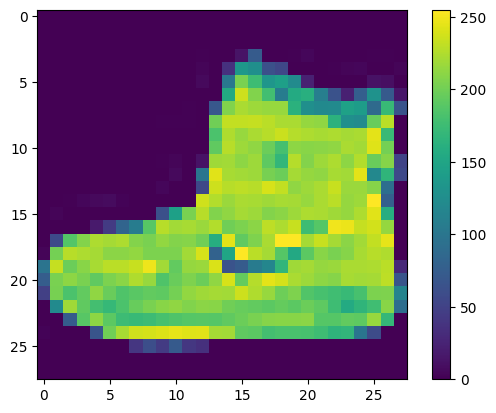

In [9]:
# Visualize the first image from the training dataset
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)

### Data Preprocessing:
- Normalizing the data
- The next step is to normalize the data dimensions so that they are approximately the same scale.

In [10]:
# scale the values to a range of 0 to 1 of both data sets
X_train_images = X_train / 255.0
X_test_images = X_test / 255.0

In [11]:
X_train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [12]:
X_test_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [13]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

### Build an Artificial Neural Network:

Model 3-layer neural network

In [15]:
# Model 3-layer neural network
model_3 = keras.Sequential([
    # In the first layer flatten the data, so that a (28x28) shape flattens to 784.
    keras.layers.Flatten(input_shape=(28,28)), 
    # The second layer is a dense layer with a ReLu activation function and has 128 neurons.
    keras.layers.Dense(128, activation=tf.nn.relu), 
    # The last layer is a dense layer with a softmax activation function that classifies the 10 categories of the data and has 10 neurons.
    keras.layers.Dense(10, activation=tf.nn.softmax) 
])

# The model summary table provides a nice visualization of the network architecture and parameters.
model_3.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The model summary table provides a nice visualization of the network architecture and parameters.

### Compile the Model: 

Compile 3-layer neural network model

In [16]:
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Train the Model:
-  Train the model by fitting it to the training data, so we give it the input (images) and expected output (labels).

Train the 3-layer neural network model

In [42]:
# Train the NN-3 with 5 epochs 
model_3.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4861 - accuracy: 0.8359 - val_loss: 0.5630 - val_accuracy: 0.8156
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4786 - accuracy: 0.8385 - val_loss: 0.5169 - val_accuracy: 0.8266
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4679 - accuracy: 0.8430 - val_loss: 0.4859 - val_accuracy: 0.8457
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4650 - accuracy: 0.8429 - val_loss: 0.5729 - val_accuracy: 0.8151
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4523 - accuracy: 0.8465 - val_loss: 0.5398 - val_accuracy: 0.8292


During training, you'll observe the following outcomes per epoch: as each epoch progresses, the loss diminishes while the accuracy rises, indicating continual improvement of our model.

### Evaluate the Model:
- Evaluate its performance. This is done on a test dataset, new data that the model hasn’t seen yet. We have to make sure to separate our training and validating dataset from our testing dataset.

Evaluate the 3-layer neural network model

In [43]:
test_loss, test_acc = model_3.evaluate(X_test, y_test)

print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.5693 - accuracy: 0.8222
Model - 3 layers - test loss: 56.927722692489624
Model - 3 layers - test accuracy: 82.22000002861023


We can see that the test loss is 56.9 and accuracy is 82.2 for this neural network, which is pretty close to the training metrics at the 4th epoch.

### Experiment with different architectures and hyperparameters to achieve better performance.
- We will compare the classification accuracy across three different depths: a 3-layer Neural Network, a 6-layer Neural Network, and a 12-layer Neural Network

Model 6-layer neural network

In [20]:
# Model a simple 6-layer neural network 
model_6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_6.summary()  

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 151306 (591.04 KB)
Trainable params: 151

In [21]:
# Compile the model
model_6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
# Train the NN-6 with 5 epochs 
model_6.fit(X_train_images, y_train, epochs=5, validation_split=0.2)

test_loss, test_acc = model_6.evaluate(X_test_images, y_test)

print("Model - 6 layers - test loss:", test_loss * 100)
print("Model - 6 layers - test accuracy:", test_acc * 100)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5151 - accuracy: 0.8115 - val_loss: 0.4041 - val_accuracy: 0.8522
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3827 - accuracy: 0.8602 - val_loss: 0.4091 - val_accuracy: 0.8499
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3443 - accuracy: 0.8719 - val_loss: 0.3534 - val_accuracy: 0.8727
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3240 - accuracy: 0.8807 - val_loss: 0.3452 - val_accuracy: 0.8717
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3500 - accuracy: 0.8769
Model - 6 layers - test loss: 35.00189781188965
Model - 6 layers - test accuracy: 87.69000172615051


Model 12-layer neural network

In [23]:
# Model a simple 6-layer neural network 
model_12 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_12.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 128)              

In [24]:
# Compile the model
model_12.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
model_12.fit(X_train_images, y_train, epochs=5, validation_split=0.2)

test_loss, test_acc = model_12.evaluate(X_test_images, y_test)

print("Model - 12 layers - test loss:", test_loss * 100)
print("Model - 12 layers - test accuracy:", test_acc * 100)

Epoch 1/5
1500/1500 [==============================] - 11s 6ms/step - loss: 0.6253 - accuracy: 0.7665 - val_loss: 0.4704 - val_accuracy: 0.8256
Epoch 2/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.4392 - accuracy: 0.8446 - val_loss: 0.4454 - val_accuracy: 0.8404
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3973 - accuracy: 0.8602 - val_loss: 0.3802 - val_accuracy: 0.8675
Epoch 4/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3717 - accuracy: 0.8698 - val_loss: 0.3943 - val_accuracy: 0.8637
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3949 - accuracy: 0.8618
Model - 12 layers - test loss: 39.491477608680725
Model - 12 layers - test accuracy: 86.18000149726868


# Test Set Prediction:

Predictions with the NN-3

In [27]:
# confidence of the model 
predictions = model_3.predict(X_test_images)
predictions.shape 
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([0.11324481, 0.04980698, 0.16681434, 0.10120047, 0.04971144,
       0.08832589, 0.1986924 , 0.06176787, 0.13965519, 0.03078062],
      dtype=float32)

In [28]:
np.argmax(predictions[0])

6

In [29]:
class_names[9]

'Ankle boot'

In [31]:
# plot image in a grid
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)  


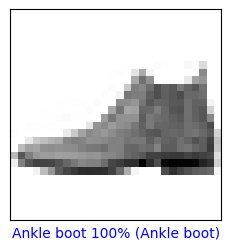

In [44]:
# look at 0th image
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test_images)


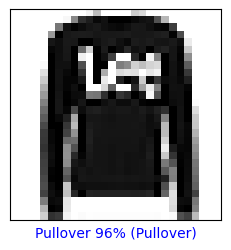

In [45]:
# try next image at index = 1
i=1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test_images)

Making predictions with the NN-6

In [34]:
# confidence of the model 
predictions = model_6.predict(X_test_images)
predictions.shape 
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([1.4554730e-04, 1.3082895e-04, 1.4167935e-04, 7.3183895e-05,
       3.3577580e-05, 2.2627411e-02, 1.4035120e-04, 5.3834558e-02,
       3.0820415e-04, 9.2256463e-01], dtype=float32)

In [35]:
np.argmax(predictions[0])

9

In [36]:
class_names[9]

'Ankle boot'

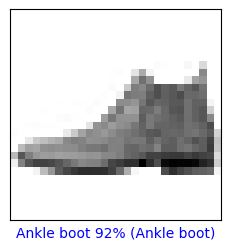

In [37]:
# look at 0th image
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test_images)

Predictions with the NN-12

In [38]:
# confidence of the model 
predictions = model_12.predict(X_test_images)
predictions.shape 
predictions[0]

313/313 [==============================] - 1s 3ms/step


array([2.4427307e-09, 1.8018128e-09, 3.1558593e-11, 2.2236662e-08,
       3.2381406e-10, 4.8143476e-05, 2.4779820e-09, 2.1145223e-03,
       4.2755909e-07, 9.9783677e-01], dtype=float32)

In [39]:
np.argmax(predictions[0])

9

In [40]:
class_names[9]

'Ankle boot'

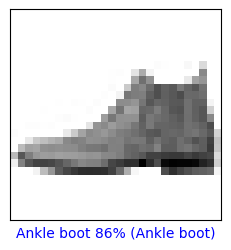

In [96]:
# look at 0th image
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test_images)